## SubsampleView Op

In [1]:
//load ImageJ
%classpath config resolver scijava.public https://maven.scijava.org/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: scijava.public


net.imagej.ImageJ@50987afc

This `Op` wraps the `Views.subsample()` method of ImgLib2, which, given a `RandomAccessibleInterval` or `RandomAccessible` performs essentially an integer scale down on that image, sampling only the nth pixel in each dimension. Let's see how this `Op` is called:

In [2]:
ij.op().help('subsampleView')

Available operations:
	(SubsampleIntervalView out) =
	net.imagej.ops.transform.subsampleView.IntervalSubsampleView(
		RandomAccessibleInterval in,
		long step)
	(SubsampleIntervalView out) =
	net.imagej.ops.transform.subsampleView.SubsampleIntervalViewStepsForDims(
		RandomAccessibleInterval in,
		long[] steps)
	(SubsampleView out) =
	net.imagej.ops.transform.subsampleView.DefaultSubsampleView(
		RandomAccessible in,
		long step)
	(SubsampleView out) =
	net.imagej.ops.transform.subsampleView.SubsampleViewStepsForDims(
		RandomAccessible in,
		long[] steps)

Note that each option takes a `long step`. This `long` tells the `Op` the length between pixels that it should subsample. For example, let's assume that `step = 2`. This tells the `Op` to make an `Img` twice as small as the original, and to sample every other value, divide that value's coordinates by two, and insert that value in those new coordinates. Note that some options have a `long[]` instead of a `long`, which can be used if you want to provide different steps in each direction (for example, if you want half the original width but a third of the original height). 

`subsampleView` is often performed on large images. Let's find one to work on: 

[INFO] Populating metadata
[INFO] Populating metadata


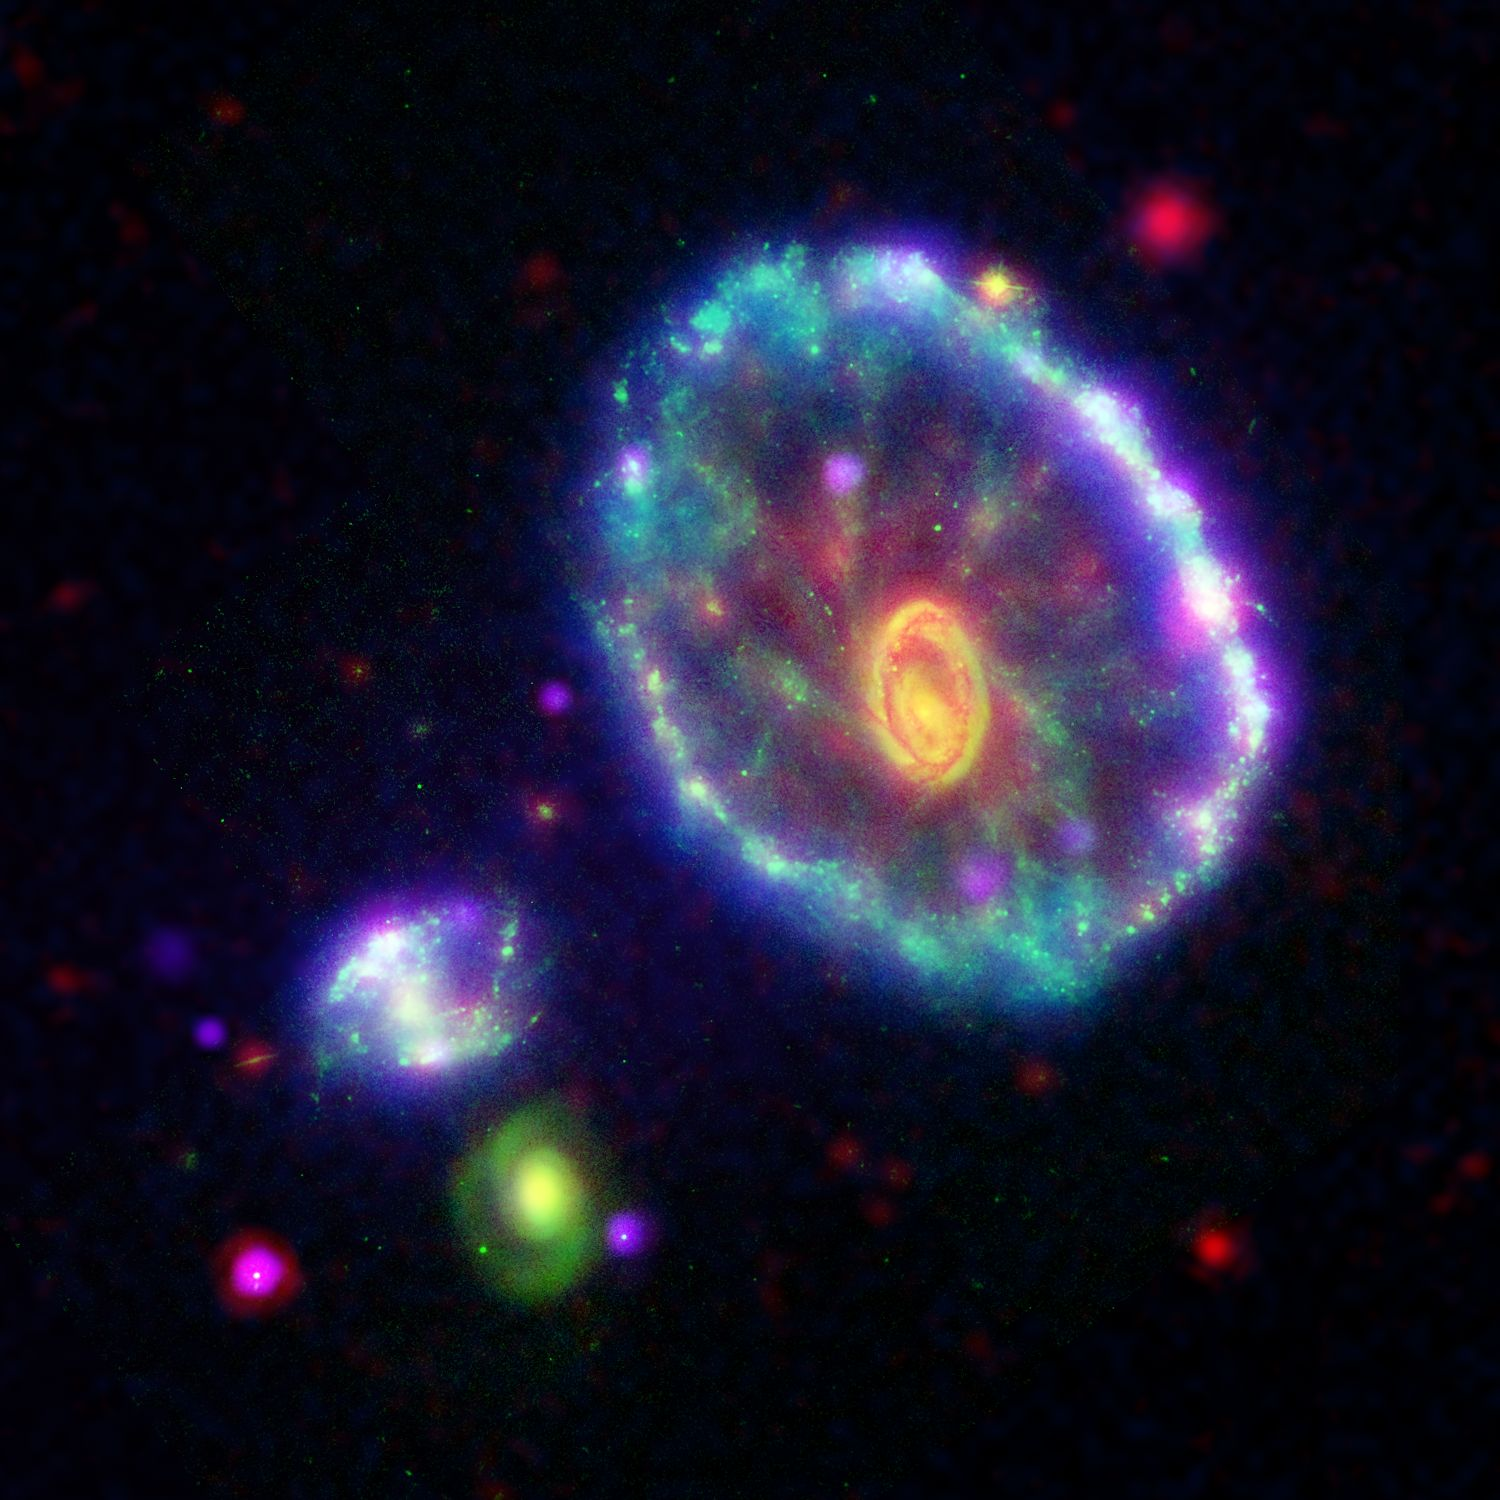

In [3]:
input = ij.scifio().datasetIO().open("http://imagej.net/images/Cartwheel_Galaxy.jpg")

ij.notebook().display(input)

Woah, that is a big image. Let's use `subsampleView()` to make it more wieldy:

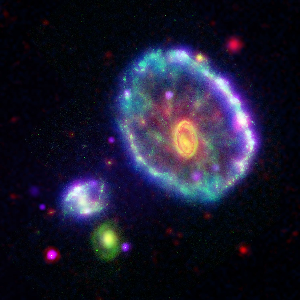

In [4]:
//note that we do not want to subsample the third dimension, since then we lose color. So the third element must be 1.
steps = [5, 5, 1] as long[]

subsample = ij.op().run("subsampleView", input, steps)

ij.notebook().display(subsample)

If you want more options to control the scale or to provide a [interpolation](https://en.wikipedia.org/wiki/Interpolation) strategy, check out [scaleView](scaleView.ipynb)!